# Clustering (K-Means y DBSCAN)

Clustering es un tipo de aprendizaje no supervisado. Su objetivo es agrupar datos similares entre sí sin usar etiquetas

Ejemplos:
- Agrupar clientes
- Detección de anomalías
- Compresión de imágenes

## K-Means
- Algoritmo de clustering más usado.
- Requiere definir K = número de clusters.
- Pasos:
    1. Inicializa K centroides (puntos aleatorios)
    2. Cada muestra se asigna al centro más cercano
    3. Se recalculan centroides (promedio de los puntos asignados)
    4. Repite hasta converger

Limitaciones:
- Necesita elegir K antes
- Supone clusters asféricos
- Sensible a outliers

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Agrupa por densidad de puntos
- Parámetros clave:
    - `eps`: radio máximo para considerar que dos puntos son vecinos.
    - `min_samples`: mínimo de puntos para formar un cluster denso.
- Ventajas:
    - No necesita K.
    - Detecta clusters de forma arbitraria.
    - Identifica outliers (etiquetados como `-1`).
- Desventaja:
    - Sensible a la escala de los datos y al valor de `eps`.

## Ejemplo - Dataset Wine
Wine dataset (13 features) -> se reduce a 2 dimensiones con PCA para la grafica.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


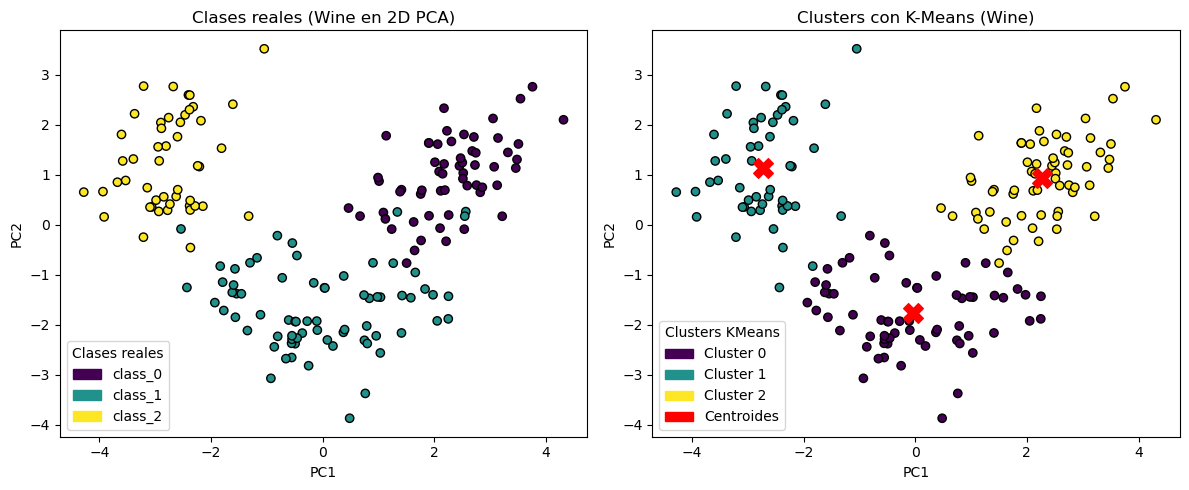

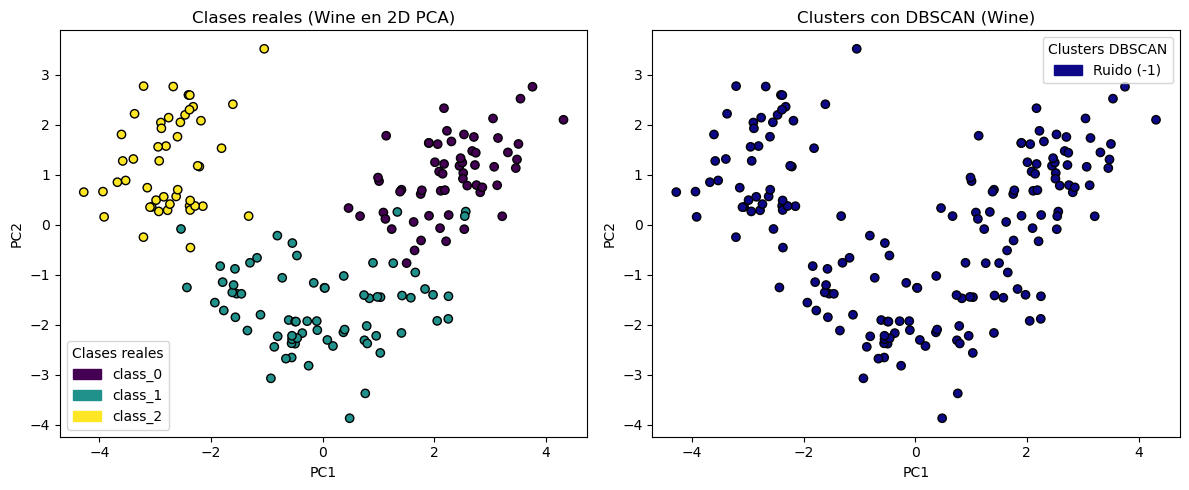

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# 1. Dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

# 2. Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reducción a 2D para visualizar (solo para plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ========================
# K-MEANS
# ========================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 5))

# --- Clases reales (izquierda)
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k")

# Leyenda manual mapeando color -> nombre de clase
handles_real = []
for cls in np.unique(y):
    color = scatter1.cmap(scatter1.norm(cls))
    handles_real.append(mpatches.Patch(color=color, label=target_names[cls]))
plt.legend(handles=handles_real, title="Clases reales")

plt.title("Clases reales (Wine en 2D PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")

# --- Clusters KMeans (derecha)
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap="viridis", edgecolor="k")

# Centroides proyectados a 2D (PCA)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c="red", marker="X", s=200, label="Centroides")

# Leyenda manual para clusters (0,1,2) sin intentar castear labels de legend_elements
handles_kmeans = []
for cl in np.unique(y_kmeans):
    color = scatter2.cmap(scatter2.norm(cl))
    handles_kmeans.append(mpatches.Patch(color=color, label=f"Cluster {cl}"))
handles_kmeans.append(mpatches.Patch(color="red", label="Centroides"))  # proxy para el marcador rojo
plt.legend(handles=handles_kmeans, title="Clusters KMeans")

plt.title("Clusters con K-Means (Wine)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# ========================
# DBSCAN
# ========================
dbscan = DBSCAN(eps=1.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)  # -1 es ruido

plt.figure(figsize=(12, 5))

# --- Clases reales (izquierda)
plt.subplot(1, 2, 1)
scatter3 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k")

handles_real2 = []
for cls in np.unique(y):
    color = scatter3.cmap(scatter3.norm(cls))
    handles_real2.append(mpatches.Patch(color=color, label=target_names[cls]))
plt.legend(handles=handles_real2, title="Clases reales")

plt.title("Clases reales (Wine en 2D PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")

# --- Clusters DBSCAN (derecha)
plt.subplot(1, 2, 2)
scatter4 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap="plasma", edgecolor="k")

# Leyenda manual para DBSCAN (incluye -1 = ruido)
handles_dbscan = []
for cl in np.unique(y_dbscan):
    color = scatter4.cmap(scatter4.norm(cl))
    label = "Ruido (-1)" if cl == -1 else f"Cluster {cl}"
    handles_dbscan.append(mpatches.Patch(color=color, label=label))
plt.legend(handles=handles_dbscan, title="Clusters DBSCAN")

plt.title("Clusters con DBSCAN (Wine)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()
